In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#Metrics used

#accuracy
#levenshtein distance
#jaccard similarity
#character error rate
#damerau-levenshtein distance

In [6]:
PATH_TO_DATA= "/content/drive/MyDrive/CODING PROJECTS/Ogunleye Project/CODES/pickled files/"

## Prepare data

Load and process images

In [7]:
#filter unusable images
import pickle
store= pickle.load(open(PATH_TO_DATA+"store.pkl", "rb"))
image_indexes_used= pickle.load(open(PATH_TO_DATA+"image_indexes_used.pkl", "rb"))

def filter_each_currency(notes, indexes):
  filtered_image_list= []
  for i in range(len(notes)):
    if i in indexes:
      filtered_image_list.append(notes[i])

  return filtered_image_list

def filter_all(store= store, image_indexes_used=image_indexes_used):
  filtered= []
  if(len(store) == len(image_indexes_used)):
    for i in range(len(store)):
      filtered.append(filter_each_currency(store[i], image_indexes_used[i]))
  else:
    print("parameters do not match, please check and try again")

  return filtered
  

#filter_images(store, image_indexes_used)

In [8]:
# save filtered images
n=0
filtered_images= filter_all()
pickle.dump(filtered_images, open(PATH_TO_DATA+"filtered_final_images.pkl", "wb"))
len(filtered_images)

8

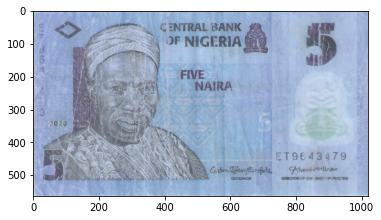

In [9]:
#n=0
import matplotlib.pyplot as plt
plt.imshow(filtered_images[0][n])

Load and process test data truth

In [10]:
# load truth test data
test_truth= pickle.load(open(PATH_TO_DATA+"test_original.pkl", "rb"))
print(test_truth[0][n])


ET964379


Load test prediction

In [13]:
#go to 2OCR.ipynb for code to get test_pred
#load pickle file

final_test_pred= pickle.load(open(PATH_TO_DATA+"final_test_pred.pkl", "rb"))
test_pred_easyocr= final_test_pred[0]
test_pred_kerasocr= final_test_pred[1]

print(test_pred_easyocr[0][n])
print(test_pred_kerasocr[0][n])


ET9€43079OA{ln3mi
43479


## FUNCTIONS FOR EVALUATION

In [14]:
!pip install -U strsimpy
!pip install jiwer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 KB 2.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 22.9 MB/s eta 0:00:00


In [15]:
#functions to calculate metrics

from strsimpy.levenshtein import Levenshtein
from strsimpy.damerau import Damerau
from strsimpy.jaccard import Jaccard
import jiwer


def preprocess_for_evaluation(li):
  # remove space from string
  tmp= str(li).strip()
  tmp= tmp.replace(" ", "")
  tmp= tmp.upper()
  
  return str(tmp)

def accuracy(truth_list, pred_list):
  acc= []
  tmp= False
  for i in range(len(truth_list)):
    truth= preprocess_for_evaluation(truth_list[i])
    pred= preprocess_for_evaluation(pred_list[i])
    if(truth == pred):
      tmp= True
    else:
      tmp== False
    acc.append(tmp)
  return acc

levenshtein= Levenshtein()
def levenshtein_distance(truth_list, pred_list):
  lev= []
  tmp= False
  for i in range(len(truth_list)):
    truth= preprocess_for_evaluation(truth_list[i])
    pred= preprocess_for_evaluation(pred_list[i])
    lev.append(levenshtein.distance(truth, pred))
  return lev

damerau= Damerau()
def damerau_distance(truth_list, pred_list):
  dam= []
  tmp= False
  for i in range(len(truth_list)):
    truth= preprocess_for_evaluation(truth_list[i])
    pred= preprocess_for_evaluation(pred_list[i])
    dam.append(damerau.distance(truth, pred))
  return dam

jaccard= Jaccard(1)
def jaccard_similarity(truth_list, pred_list):
  jac= []
  tmp= False
  for i in range(len(truth_list)):
    truth= preprocess_for_evaluation(truth_list[i])
    pred= preprocess_for_evaluation(pred_list[i])
    jac.append(jaccard.similarity(truth, pred))

  return jac

def character_error_rate(truth_list, pred_list):
  cer= []
  tmp= False
  for i in range(len(truth_list)):
    truth= preprocess_for_evaluation(truth_list[i])
    pred= preprocess_for_evaluation(pred_list[i])
    cer.append(jiwer.cer(truth, pred))
  return cer

def mean_score(li):
  n_round= 5
  res= sum(li)/len(li)
  res= round(res, n_round)
  return res

def show_all_metrics(truth, pred, method_string):

  inp= get_scores_list(truth, pred)
  out= []
  acc= "Accuracy score for " + method_string + " is " + str(mean_score(inp[0]))
  lev= "Levenshtein_distance score for " + method_string + " is " + str(mean_score(inp[1]))
  jac= "Jaccard_similarity score for " + method_string + " is " + str(mean_score(inp[2]))
  cer= "Character_error_rate score for " + method_string + " is " + str(mean_score(inp[3]))
  dam= "Damerau_distance score for " + method_string + " is " + str(mean_score(inp[4])) 

  out= [acc, lev, jac, cer, dam]
  #return out
  for i in out:
    print(i)
  return None

def get_scores_list(truth, pred):
  acc, lev, jac, cer, dam= [], [], [], [], []
  for i in range(len(truth)): 
    acc.append(accuracy(truth[i], pred[i]))
    lev.append(levenshtein_distance(truth[i], pred[i]))
    jac.append(jaccard_similarity(truth[i], pred[i]))
    cer.append(character_error_rate(truth[i], pred[i]))
    dam.append(damerau_distance(truth[i], pred[i]))

  res= []

  tmp= []
  for i in acc:
    tmp= tmp+i
  res.append(tmp)

  tmp= []
  for i in lev:
    tmp= tmp+i 
  res.append(tmp)

  tmp= []
  for i in jac:
    tmp= tmp+i 
  res.append(tmp)

  tmp= []
  for i in cer:
    tmp= tmp+i 
  res.append(tmp)

  tmp= []
  for i in dam:
    tmp= tmp+i 
  res.append(tmp)
  
  return res

## Evaluation with metrics

In [16]:
import pickle
filtered_images= pickle.load(open(PATH_TO_DATA+"filtered_final_images.pkl", "rb"))
test_truth= pickle.load(open(PATH_TO_DATA+"test_original.pkl", "rb"))
final_test_pred= pickle.load(open(PATH_TO_DATA+"final_test_pred.pkl", "rb"))
test_pred_easyocr= final_test_pred[0]
test_pred_kerasocr= final_test_pred[1]
test_pred_pytesseract= final_test_pred[2]

EASYOCR

In [17]:
#get_scores_list(test_truth, test_pred_easyocr)
show_all_metrics(test_truth, test_pred_easyocr, "EASYOCR")

Accuracy score for EASYOCR is 0.81313
Levenshtein_distance score for EASYOCR is 3.11616
Jaccard_similarity score for EASYOCR is 0.74
Character_error_rate score for EASYOCR is 0.39015
Damerau_distance score for EASYOCR is 3.11616


KERASOCR

In [18]:
show_all_metrics(test_truth, test_pred_kerasocr, "KERASOCR")

Accuracy score for KERASOCR is 0.60101
Levenshtein_distance score for KERASOCR is 3.35859
Jaccard_similarity score for KERASOCR is 0.51542
Character_error_rate score for KERASOCR is 0.46135
Damerau_distance score for KERASOCR is 3.35859


PYTESSERACT

In [19]:
show_all_metrics(test_truth, test_pred_pytesseract, "PYTESSERACT")

Accuracy score for PYTESSERACT is 0.38889
Levenshtein_distance score for PYTESSERACT is 5.96465
Jaccard_similarity score for PYTESSERACT is 0.23935
Character_error_rate score for PYTESSERACT is 0.79658
Damerau_distance score for PYTESSERACT is 5.96465
